# Lab 10: Random Walks

**Goal:** Introduce concepts of probability and random
  processes in the context of model physical systems. 
  
- Start with the simplest model: the intoxicated walk.  
- Each step is of equal length $l$ and independent of the preceding step.
- At each interval the walker has a probability $p$ of a step to
  the right and probability $q=1-p$ of a step to the left.
- Let $n_r$ be the number steps to the right and $n_l$ be the
  number of steps to the left.  
-  The total number of steps is $N = n_r + n_l$ and the net
  displacement is $x = (n_r - n_l)/l$ where $-Nl \le x \le Nl$.
- The main quantity of interest is the probability $P_N(x)$ that
  after $N$ steps, the walker has undergone a net displacement $x$.
  
- The mean net displacement is ($\sum P_N(x) = 1$)
\begin{equation*}
\langle x_N \rangle = \sum_{x = -Nl}^{Nl} x P_N(x)
\end{equation*}
- The variance is
\begin{equation*}
\langle \Delta x_N^2 \rangle = \langle x_N^2 \rangle - \langle x_N \rangle^2
\end{equation*}
where
\begin{equation*}
\langle x_N^2 \rangle = \sum_{x = -Nl}^{Nl} x^2 P_N(x)
\end{equation*}
-  The averages are over all possible walks of $N$ steps.

-  For the symmetric case, $p = q = 1$, $\langle x_N \rangle = 0$.

## Exercise 1: 1-D random walk

1. Comment the program below and plot $P_N(x)$ for $ntrials = [10,100,1000,10000].$

2. Normalize $P_N(x)$ such that $\sum P_N(x) = 1.0$.

3. Determine $\langle x_N \rangle$ and $\langle \Delta x_N^2 \rangle$.  Compare with the analytical results (e.g., Reif, Fundamentals of Statistical and
  Thermal Physics),
\begin{equation*}
\langle x_N \rangle = (p - q)Nl
\end{equation*}
and
\begin{equation*}
\langle \Delta x_N^2 \rangle = 4pqNl^2
\end{equation*}

4. Determine the number of trials necessary to obtain $\langle \Delta x^2 \rangle$ to 1\% accuracy. 

**I would say, on above average, 10000 seems to be enough to get around 1% discrepancy for the variance. However to semi-guarentee 1% accuracy it seems like it needs to be 25000 trials or more (I had a 25000 trial be 1.5%)**

5. Show that $P_N(x)$ can be approximated by a Gaussian distribution
\begin{equation*}
P(x) = \frac{1}{\sigma \sqrt{2 \pi}} e^{-(x- \langle x \rangle)^2/(2 \sigma^2)}
\end{equation*}
where $\sigma^2 = \langle \Delta x^2 \rangle$.  Does the fit work equally well for all $x$?

**It doesn't seem like it, it works well when it comes to the edges but the magnitudes in the middle don't match up.**

6. Suppose that $p= 0.7$.  Compute $\langle x_N \rangle$, $\langle x_N^2 \rangle$, and $\langle \Delta x_N^2 \rangle$.


The exact mean is: 0.0
The exact variance is: 64.0
For 10 trials:
The calculated mean is: -2.5999999999999996
The calculated variance is 72.04000000000002
Variance Discrepency: 0.12562500000000032
 
For 100 trials:
The calculated mean is: -0.56
The calculated variance is 64.7264
Variance Discrepency: 0.011349999999999971
 
For 1000 trials:
The calculated mean is: 0.14999999999999947
The calculated variance is 58.3095
Variance Discrepency: 0.0889140625
 
For 10000 trials:
The calculated mean is: -0.006600000000000161
The calculated variance is 65.00595644
Variance Discrepency: 0.015718069375000088
 
For 25000 trials:
The calculated mean is: -0.030879999999999797
The calculated variance is 65.2304064256
Variance Discrepency: 0.019225100399999917
 
For 50000 trials:
The calculated mean is: -0.05708000000000002
The calculated variance is 64.0321818736
Variance Discrepency: 0.0005028417749999292
 
If P = 0.7 :
The exact mean is: 25.599999999999994
The exact variance is: 53.760000000000005
T

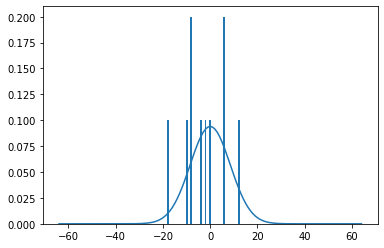

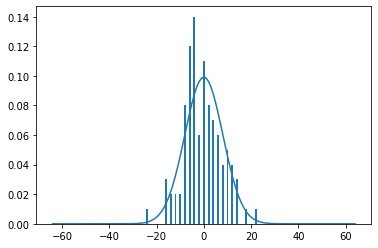

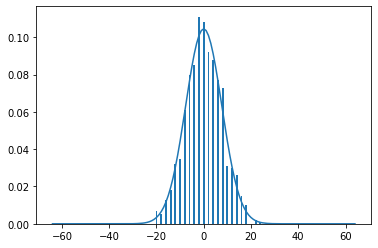

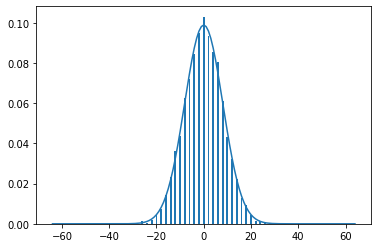

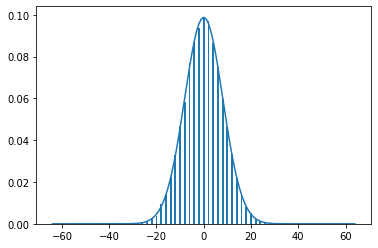

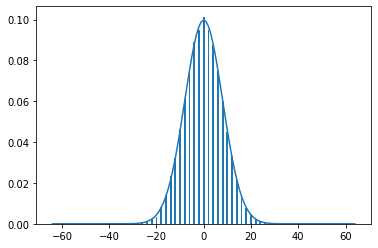

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random as rnd

# Function for the Gaussian
def gaussian(x, variance):
    return (1/np.sqrt(variance*2*np.pi))*np.exp(-(x-np.average(x))**2/(2*variance))

# Function to return the vairance
def calc_mean_and_variance(x,pN):
    xN = np.sum(np.multiply(x,pN))
    xN2 = np.sum(np.multiply(np.square(x),pN))
    deltaxN2 = xN2 - np.square(xN) 
    return xN, deltaxN2

# Returns pN, where pN is the probability 
def get_pN(x,ntrial,p):
    # Initializes a zero prob curve
    pN = np.zeros(len(x))
    # Finds the middle of the x array (x == 0)
    wh = np.where(x == 0.0)
    for _ in range(ntrial):
        # For each trial it sets i = value at that pool location (x == 0)
        i = wh[0]
        for _ in range(N):
            # Will then add or subtract 1 to this number N times
            if (rnd.random() <= p):
                i = i+1
            else:
                i = i-1
        # Adds one to what that number ended up being
        pN[i] += 1.0
    return pN

p = 0.5         # Probability for right step
q = 1-p         # Probability for left step
N = 64          # Number of steps
l = 1           # Step length

# Sets a space for the number of steps
x = np.arange(-N,(N+1),1)

exact_mean = (p-q)*N*l
exact_variance = 4*p*q*N*l**2
print("The exact mean is: " + str(exact_mean))
print("The exact variance is: " + str(exact_variance))

# 10 Trials
ntrial = 10
pN = get_pN(x,ntrial,p)
pN = pN/ntrial # Normalizes the distribution
[mean,variance] = calc_mean_and_variance(x,pN)
print("For " + str(ntrial) + " trials:")
print("The calculated mean is: " + str(mean))
print("The calculated variance is " + str(variance))
print("Variance Discrepency: " + str(abs(exact_variance-variance)/exact_variance))
print(" ")

fx = gaussian(x,variance)
plt.figure()
plt.bar(x,pN)
plt.plot(x,2*fx) # Muliplied by two since even numbers are only used

# 100 Trials
ntrial = 100
pN = get_pN(x,ntrial,p)
pN = pN/ntrial # Normalizes the distribution
[mean,variance] = calc_mean_and_variance(x,pN)
print("For " + str(ntrial) + " trials:")
print("The calculated mean is: " + str(mean))
print("The calculated variance is " + str(variance))
print("Variance Discrepency: " + str(abs(exact_variance-variance)/exact_variance))
print(" ")

fx = gaussian(x,variance)
plt.figure()
plt.bar(x,pN)
plt.plot(x,2*fx) # Muliplied by two since even numbers are only used

# 1000 Trials
ntrial = 1000
pN = get_pN(x,ntrial,p)
pN = pN/ntrial # Normalizes the distribution
[mean,variance] = calc_mean_and_variance(x,pN)
print("For " + str(ntrial) + " trials:")
print("The calculated mean is: " + str(mean))
print("The calculated variance is " + str(variance))
print("Variance Discrepency: " + str(abs(exact_variance-variance)/exact_variance))
print(" ")

fx = gaussian(x,variance)
plt.figure()
plt.bar(x,pN)
plt.plot(x,2*fx) # Muliplied by two since even numbers are only used

# 10000 Trials
ntrial = 10000
pN = get_pN(x,ntrial,p)
pN = pN/ntrial # Normalizes the distribution
[mean,variance] = calc_mean_and_variance(x,pN)
print("For " + str(ntrial) + " trials:")
print("The calculated mean is: " + str(mean))
print("The calculated variance is " + str(variance))
print("Variance Discrepency: " + str(abs(exact_variance-variance)/exact_variance))
print(" ")

fx = gaussian(x,variance)
plt.figure()
plt.bar(x,pN)
plt.plot(x,2*fx) # Muliplied by two since even numbers are only used

# 25000 Trials
ntrial = 25000
pN = get_pN(x,ntrial,p)
pN = pN/ntrial # Normalizes the distribution
[mean,variance] = calc_mean_and_variance(x,pN)
print("For " + str(ntrial) + " trials:")
print("The calculated mean is: " + str(mean))
print("The calculated variance is " + str(variance))
print("Variance Discrepency: " + str(abs(exact_variance-variance)/exact_variance))
print(" ")

fx = gaussian(x,variance)
plt.figure()
plt.bar(x,pN)
plt.plot(x,2*fx) # Muliplied by two since even numbers are only used

# 50000 Trials
ntrial = 50000
pN = get_pN(x,ntrial,p)
pN = pN/ntrial # Normalizes the distribution
[mean,variance] = calc_mean_and_variance(x,pN)
print("For " + str(ntrial) + " trials:")
print("The calculated mean is: " + str(mean))
print("The calculated variance is " + str(variance))
print("Variance Discrepency: " + str(abs(exact_variance-variance)/exact_variance))
print(" ")

fx = gaussian(x,variance)
plt.figure()
plt.bar(x,pN)
plt.plot(x,2*fx) # Muliplied by two since even numbers are only used 

#-------------------------------------------------------------------------------
# Setting P = 0.7
#-------------------------------------------------------------------------------
p = 0.7
q = 1-p         # Probability for left step
N = 64          # Number of steps
l = 1           # Step length

# Sets a space for the number of steps
x = np.arange(-N,(N+1),1)

exact_mean = (p-q)*N*l
exact_variance = 4*p*q*N*l**2
exact_squared_mean = exact_mean**2 + exact_variance
print("If P = " + str(p) + " :")
print("The exact mean is: " + str(exact_mean))
print("The exact variance is: " + str(exact_variance))
print("The exact squared_mean is: " + str(exact_squared_mean))

# Exercise 2: 2-D diffusion

Consider a collection of $N$ bees which are initially localized in a circle of unit radius centered on the origin. At each time step, each bee moves at random with equal probability to one of four possible directions. 

1. Comment "class bees" which models the "diffusion" of a bee swarm. 

2. Plot the bees as points and describe the qualitative nature of the motion of the swarm as a function of time. 

**As time moves on, the swarm gets denser in the middle and slowly spreads out wards "equally" in all directions. The same applies when you add more trials or steps since that is essentially adding more time to the addition and spread of bees.**

3. Suppose that each bee is given a random initial velocity in one of the four directions.  At each time interval, each bee takes a step of magnitude unity in the same direction as its original velocity.  Is the motion of the swarm changed from part 2?  

**No. They should still move in random directions making a diffusion like graph. However, since the velocity is random, the diffusion might be a bit more spread out. Post Writing the Function: Nevermind, the diffusion is not different when using different velocities.**

4. Compute $\langle x_N \rangle$, $\langle y_N \rangle$, $\langle \Delta x_N^2 \rangle$, and $\langle \Delta y_N^2 \rangle$ for both cases above. Also compute  the net mean square displacement
$$\langle \Delta R_N^2 \rangle = \langle \Delta x_N^2 \rangle + \langle \Delta y_N^2 \rangle - \langle x_N \rangle \langle x_N \rangle - \langle y_N \rangle \langle y_N \rangle $$
What is the qualitative dependence of these quantities on the number of time steps?

**The Mean and the Variance are around half that of the number of steps and the net mean square displacment is around the number of steps**

5. Plot the diffusion coefficient $D(t) = \langle \Delta R_N^2(t) \rangle/(2 d t)$ (where $d$ is the spatial dimension, i.e., 2) as a function of time and compare your results with the analytical solution to the diffusion equation of the form
\begin{equation*}
P(x,t) = (2 \pi D t)^{-1/2} e^{-x^2/4 D t}
\end{equation*}
Note that the measure of "time" in this context is arbitrary.  The usual definition is that one unit of time corresponds to one Monte Carlo step per particle.  During one Monte Carlo step per particle, each particle attempts one jump *on the average*.

**From my understanding this is just that last plot, right? With the orange data cells and the fitted Gaussian? Cause then it seems like this question is already finished... Thank you if so, ha.**


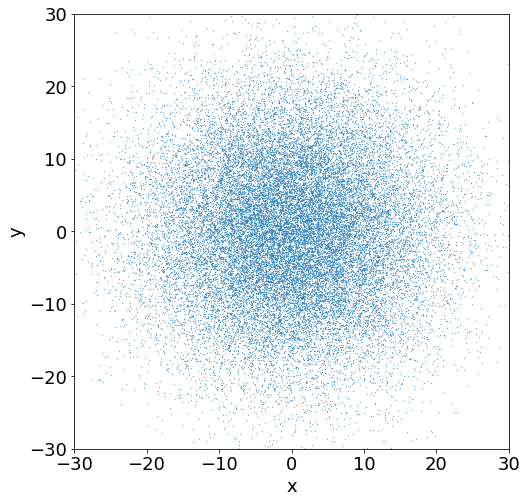

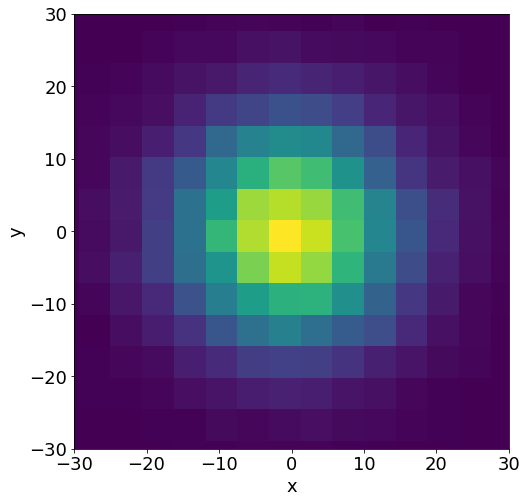

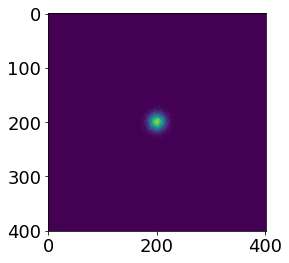

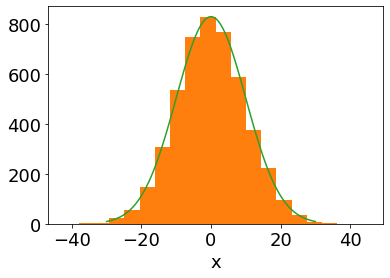

Random Unitary Steps Data:
Mean X: -0.11686666666666665
Variance X: 100.21326666666668
Mean Y: 0.024666666666666708
Variance Y: 99.77399999999999
Net Mean Square Displacement: 199.97300040444443


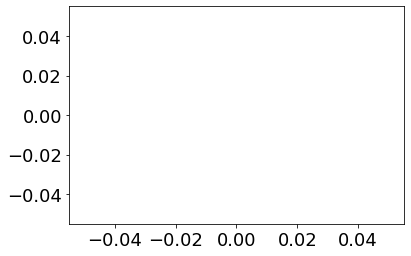

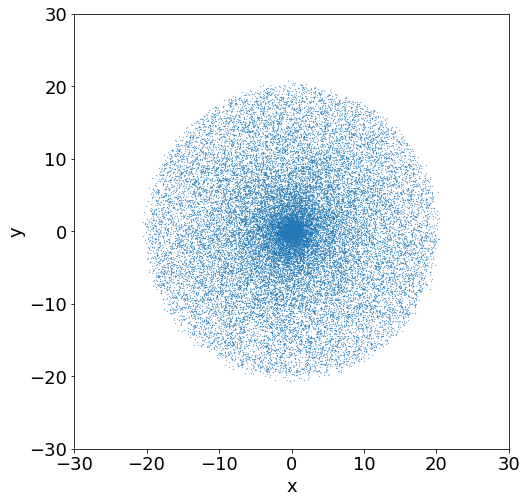

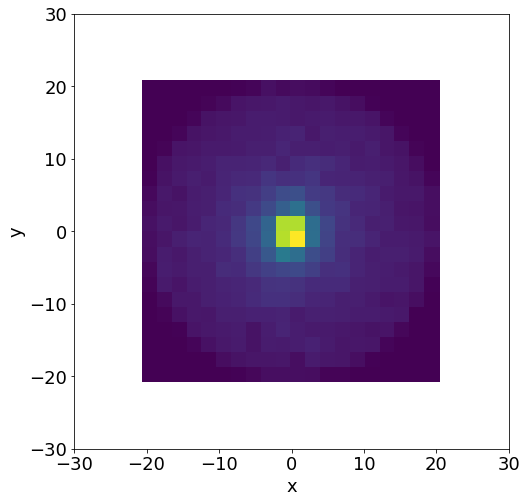

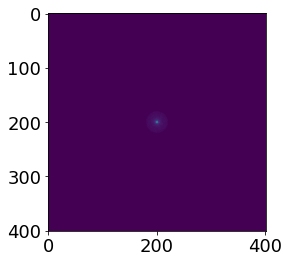

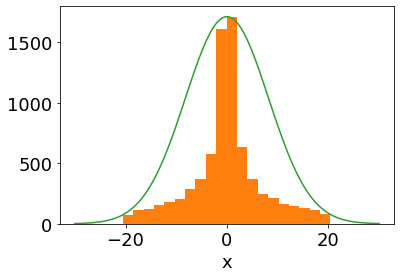

Random Unitary Velocities Data:
Mean X: -0.05223333333333334
Variance X: 66.92196666666669
Mean Y: 0.047966666666666644
Variance Y: 67.39836666666666
Net Mean Square Displacement: 134.3153042111111


In [2]:
plt.rcParams.update({'font.size': 18})
from mpl_toolkits.mplot3d import Axes3D

#Not the bees!

class bees:

    def __init__(self,N,nsteps):
        self.N = N
        self.x = np.arange(-nsteps,(nsteps+1),1)
        self.y = np.arange(-nsteps,(nsteps+1),1)
        self.xpos = -1 + 2*np.random.rand(N)
        self.ypos = -1 + 2*np.random.rand(N)
        self.vx = (-1 + 2*np.random.rand(N))/10
        self.vy = (-1 + 2*np.random.rand(N))/10
        self.p = 0.5
        self.stepsize = 1.0
        self.nsteps = nsteps
        self.pN = np.zeros([2*nsteps+1,2*nsteps+1])
    
    #For each step of each trial it picks a random direction 
    #   and adds 1 to the coordinates it ended up at.
    def move_bees(self):
        for i in range(self.N):
            for _ in range(self.nsteps):
                r = rnd.random()
                if (r <= 0.5):
                    if (rnd.random() <= self.p):
                        self.xpos[i] = self.xpos[i] + self.stepsize
                    else:
                        self.xpos[i] = self.xpos[i] - self.stepsize
                else:
                    if (rnd.random() <= self.p):
                        self.ypos[i] = self.ypos[i] + self.stepsize
                    else:
                        self.ypos[i] = self.ypos[i] - self.stepsize
            j = int(round(self.xpos[i])) + self.nsteps
            k = int(round(self.ypos[i])) + self.nsteps
            self.pN[j,k] += 1
        self.pN = self.pN/self.pN.sum()

    def move_bees_v_init(self):  #uses random velocity initialization.
        rtheta = np.random.rand(N)*2*np.pi
        rr = np.random.rand(N)/10
        self.vx = rr*np.cos(rtheta)
        self.vy = rr*np.sin(rtheta)
        rtheta = np.random.rand(N)*2*np.pi
        rr = np.random.rand(N)
        self.xpos = rr*np.cos(rtheta)
        self.ypos = rr*np.sin(rtheta)
        for i in range(self.N):
            self.xpos[i] = self.xpos[i] + self.vx[i]*self.nsteps
            self.ypos[i] = self.ypos[i] + self.vy[i]*self.nsteps
            j = int(round(self.xpos[i])) + self.nsteps  
            k = int(round(self.ypos[i])) + self.nsteps
            self.pN[j,k] += 1
        self.pN = self.pN/self.pN.sum()

    # My initial attempt at velocity randomization
    #def move_bees_v_init(self):
    #    for i in range(self.N):
    #        for _ in range(self.nsteps):
    #            r = rnd.random()
    #            if (r <= 0.5):
    #                if (rnd.random() <= self.p):
    #                    self.xpos[i] += self.vx[i]/(np.abs(self.vx[i]))
    #                else:
    #                    self.xpos[i] -= self.vx[i]/(np.abs(self.vx[i]))
    #            else:
    #                if (rnd.random() <= self.p):
    #                    self.ypos[i] += self.vy[i]/(np.abs(self.vy[i]))
    #                else:
    #                    self.ypos[i] -= self.vy[i]/(np.abs(self.vy[i]))
    #        j = int(round(self.xpos[i])) + nsteps
    #        k = int(round(self.ypos[i])) + nsteps
    #        self.pN[j,k] += 1
    #    self.pN = self.pN/self.pN.sum()
                 
    def plot_bees(self,xmin,xmax):
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111)
        ax.plot(self.xpos,self.ypos,'.',markersize=0.5)
        #ax.plot(self.xvpos,self.yvpos,'.',markersize=0.1)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((xmin,xmax))
        plt.show()
        
        fig = plt.figure(figsize=(10,8))
        ax = fig.add_subplot(111)
        ax.hist2d(self.xpos,self.ypos,bins=[20,20])
        ax.set_xlabel('x')
        ax.set_ylabel('y')
        ax.set_aspect('equal')
        ax.set_xlim((xmin,xmax))
        ax.set_ylim((xmin,xmax))
        plt.show()
        
    def plot_bees_1d(self,xmin,xmax,D):
        plt.figure()
        wh = np.where(abs(self.ypos) <= 2.0)
        plt.hist(self.xpos[wh[0]],bins=20)
        h = plt.hist(self.xpos[wh[0]],bins=20)
        maxh = np.max(h[0:int(len(h)/2)])
    
        plt.xlabel('x')
        x = np.linspace(xmin,xmax,100)
        fx = (2*np.pi*D*self.nsteps)**(-1./2.)*np.exp(-x**2/(4*D*self.nsteps))
        plt.plot(x,maxh*fx/np.max(fx))
        plt.show()
    
    #Calculates the mean, variance and net mean square difference of both dimensions
    def mean_x(self):
        xbar = 0.0
        xbar2 = 0.0
        ybar = 0.0
        ybar2 = 0.0
        for j in range(len(self.y)):
            xbar += np.sum(self.x[:]*self.pN[:,j])        # x-Mean
            xbar2 += np.sum(self.x[:]**2*self.pN[:,j])    # x-Squared Mean
        for i in range(len(self.x)):
            ybar += np.sum(self.y[:]*self.pN[i,:])        # y-Mean
            ybar2 += np.sum(self.y[:]**2*self.pN[i,:])    # y-Squared Mean
        DeltaR2 = xbar2 + ybar2 - xbar*xbar - ybar*ybar   # Variance
        return xbar,xbar2,ybar,ybar2,DeltaR2
    
N = 30000     # Number of trials
nsteps = 200  # Number of steps
maxx = 30     # Max dimension value 
minx = -30    # Min dimension value

# Random Unitary Steps
b = bees(N,nsteps)
b.move_bees()      
b.plot_bees(minx,maxx)

plt.figure()
plt.imshow(b.pN)
[xbar,xbar2,ybar,ybar2,DR2] = b.mean_x()
D = DR2/(2*2*nsteps)
b.plot_bees_1d(minx,maxx,D)

# Plotting the diffusion equation
#estimate = DR2/4*t
estimate = DR2/4*nsteps
plt.plot()

print("Random Unitary Steps Data:")
print("Mean X: " + str(xbar))
print("Variance X: " + str(xbar2))
print("Mean Y: " + str(ybar))
print("Variance Y: " + str(ybar2))
print("Net Mean Square Displacement: " + str(DR2))
#-------------------------------------------------------------------------------
# Random Unitary Velocity
b1 = bees(N,nsteps)
b1.move_bees_v_init()
b1.plot_bees(minx,maxx)

plt.figure()
plt.imshow(b1.pN)
[xbar,xbar2,ybar,ybar2,DR2] = b1.mean_x()
D = DR2/(2*2*nsteps)
b1.plot_bees_1d(minx,maxx,D)

# Plotting the diffusion equation
#estimate = 
#plt.plot

print("Random Unitary Velocities Data:")
print("Mean X: " + str(xbar))
print("Variance X: " + str(xbar2))
print("Mean Y: " + str(ybar))
print("Variance Y: " + str(ybar2))
print("Net Mean Square Displacement: " + str(DR2))
#-------------------------------------------------------------------------------
#Interesting video about the fastest way to loop in Python: 
#https://www.youtube.com/watch?v=Qgevy75co8c&t=318s

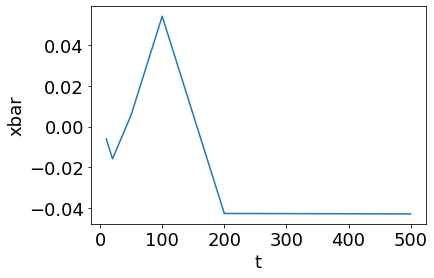

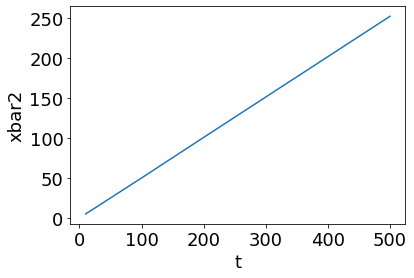

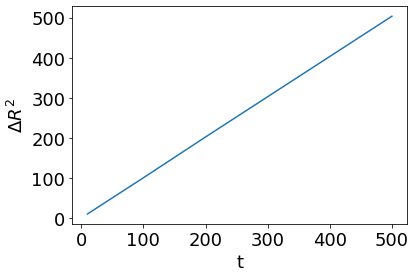

In [3]:
#Part 4
N = 50000
nsteps = 50
maxx = 30
minx = -30

tarr = [10,20,50,100,200,500]
#tarr = np.arange(10,1000,10)
xbar_arr = []
xbar2_arr = []
DR2_arr = []
for i in range(len(tarr)):
    b = bees(N,tarr[i])
    b.move_bees()      
    [xbar,xbar2,ybar,ybar2,DR2] = b.mean_x()
    xbar_arr.append(xbar)
    xbar2_arr.append(xbar2)
    DR2_arr.append(DR2)

plt.plot(tarr,xbar_arr)
plt.xlabel('t')
plt.ylabel('xbar')
plt.show()

plt.plot(tarr,xbar2_arr)
plt.xlabel('t')
plt.ylabel('xbar2')
plt.show()

plt.plot(tarr,DR2_arr)
plt.xlabel('t')
plt.ylabel('$\Delta R^2$')
plt.show()
